In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split

In [2]:
docs = pd.read_table("/Volumes/MyFiles/MachineLearning/upgrad/LiveCourse/Naive Bayes/SMSSpamCollection",names=['class','sms'])

In [3]:
docs.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Length of Documents - 5572 documents 

len(docs)

5572

In [5]:
# Count No of Spam and No of Ham 

docs['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [6]:
# SPAM RATE

round(100*len(docs[docs['class']=='spam'])/len(docs.index),2)

13.41

In [7]:
# HAM RATE

round(100*len(docs[docs['class']=='ham'])/len(docs.index),2)

86.59

In [8]:
# Categorical Encode SPAM AND HAM

docs['class'] = docs['class'].map({'spam':1,'ham':0})
docs['class']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [9]:
# Split the data to X & Y

X = docs[['sms']]
Y = docs[['class']]

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.3,random_state=42)

In [11]:
xtrain.head()

,sms
708,Quite late lar... Ard 12 anyway i wun b drivin...
4338,on a Tuesday night r u 4 real
5029,Go chase after her and run her over while she'...
4921,"G says you never answer your texts, confirm/deny"
2592,Still work going on:)it is very small house.


In [12]:
ytrain.head()

,class
708,0
4338,0
5029,0
4921,0
2592,0


# Using CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(stop_words='english')

In [14]:
countvect.fit_transform(xtrain['sms'])

<3900x7004 sparse matrix of type '<class 'numpy.int64'>'
	with 30655 stored elements in Compressed Sparse Row format>

In [15]:
#countvect.vocabulary_

In [16]:
# vocab size

len(countvect.vocabulary_.keys())

7004

In [17]:
# Transforming the matrix in compressed row format

xtrain_cv_transformed = countvect.transform(xtrain['sms'])

# Transforming Test Data

xtest_cv_transformed = countvect.transform(xtest['sms'])

In [18]:
print(type(xtrain_cv_transformed))

<class 'scipy.sparse.csr.csr_matrix'>


In [19]:
#FeatureNames

#print(countvect.get_feature_names())

#Len of the Features

print(len(countvect.get_feature_names()))

pd.DataFrame(xtrain_cv_transformed.toarray(),columns=countvect.get_feature_names())

7004


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
pd.DataFrame(xtest_cv_transformed.toarray(),columns=countvect.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
xtrain_cv_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
print(xtrain_cv_transformed)

  (0, 260)	1
  (0, 944)	1
  (0, 2222)	1
  (0, 3630)	1
  (0, 3635)	1
  (0, 5026)	1
  (0, 6908)	1
  (1, 4330)	1
  (1, 5088)	1
  (1, 6400)	1
  (2, 1558)	1
  (2, 1883)	1
  (2, 5321)	1
  (2, 5910)	1
  (3, 890)	1
  (3, 1763)	1
  (3, 2033)	1
  (3, 5393)	1
  (3, 6158)	1
  (4, 2865)	1
  (4, 3169)	1
  (4, 5676)	1
  (4, 6865)	1
  (5, 3166)	1
  (5, 3715)	1
  :	:
  (3895, 2278)	1
  (3895, 2892)	1
  (3895, 3086)	1
  (3895, 3734)	1
  (3895, 6836)	1
  (3895, 6852)	1
  (3896, 3638)	1
  (3896, 3759)	1
  (3896, 5752)	1
  (3897, 2712)	1
  (3897, 3049)	1
  (3897, 4852)	1
  (3897, 5099)	1
  (3897, 5756)	1
  (3897, 5757)	1
  (3898, 3464)	1
  (3898, 4387)	1
  (3898, 5482)	1
  (3898, 6286)	1
  (3899, 2081)	1
  (3899, 3493)	1
  (3899, 4250)	1
  (3899, 5389)	1
  (3899, 5724)	1
  (3899, 6076)	1


In [23]:
# Building MultiNomial Naive Bayes

import warnings

warnings.filterwarnings("ignore")

mnb = MultinomialNB()

mnb.fit(xtrain_cv_transformed,ytrain)

y_pred_cv_class = mnb.predict(xtest_cv_transformed)

y_pred_cv_proba = mnb.predict_proba(xtest_cv_transformed)


In [24]:
y_pred_cv_class

array([0, 0, 0, ..., 0, 1, 0])

In [25]:
y_pred_cv_proba

array([[9.99853440e-01, 1.46559680e-04],
       [9.95887085e-01, 4.11291459e-03],
       [9.99999715e-01, 2.85051896e-07],
       ...,
       [9.99999915e-01, 8.50005602e-08],
       [6.39596916e-13, 1.00000000e+00],
       [9.99999922e-01, 7.81807136e-08]])

# Model Evaluation

In [26]:
from sklearn import metrics

metrics.accuracy_score(ytest,y_pred_cv_class)

0.9874401913875598

In [27]:
# confusion matrix

metrics.confusion_matrix(ytest,y_pred_cv_class)

array([[1438,   10],
       [  11,  213]])

In [28]:
# confusion matrix - Here are negative class is not spam and positve class is spam and we dont want 

# out negative class to be identified as a spam 

confusion = metrics.confusion_matrix(ytest,y_pred_cv_class)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

print(confusion)

[[1438   10]
 [  11  213]]


In [29]:
senstivity = TP/float(TP+FN) # out of actual spams how many are correctly predicted

specificity = TN/float(TN+FP) # out of all the hame how many model correctly predicted 
#-- We want this to be high since we dont want actualy mails to be classified as spam

precision = TP/(TP+FP)


print(senstivity or recall)
print(specificity)
#print(precision)

print(metrics.precision_score(ytest,y_pred_cv_class)) # Of all the set where model has predcited as positive i.e spam how many are actually positives

print(metrics.recall_score(ytest,y_pred_cv_class)) 

print(metrics.f1_score(ytest,y_pred_cv_class)) # Harmonic mean between precision and recall its good 

0.9508928571428571
0.9930939226519337
0.9551569506726457
0.9508928571428571
0.9530201342281879


In [30]:
y_pred_cv_proba

array([[9.99853440e-01, 1.46559680e-04],
       [9.95887085e-01, 4.11291459e-03],
       [9.99999715e-01, 2.85051896e-07],
       ...,
       [9.99999915e-01, 8.50005602e-08],
       [6.39596916e-13, 1.00000000e+00],
       [9.99999922e-01, 7.81807136e-08]])

In [31]:
y_pred_cv_proba[:,1]

array([1.46559680e-04, 4.11291459e-03, 2.85051896e-07, ...,
       8.50005602e-08, 1.00000000e+00, 7.81807136e-08])

In [32]:
FPR = FP/(TN+FP) # TN+FP total negative 1-FPR is specificity

print(FPR)

#Treu Positive Rate

TPR = TP/(TP+FN) # TN+FP total negative - Sensitivity

print(TPR)

0.006906077348066298
0.9508928571428571


In [33]:
# Create an ROC Curve Pass the negative probability

# The function takes both the true outcomes (0,1) 
# from the test set and the predicted probabilities for the 1 class. 
# The function returns the false positive rates for each threshold, 
# true positive rates for each threshold and thresholds

from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr,tpr,thresholds = roc_curve(ytest,y_pred_cv_proba[:,1])

auc_score = roc_auc_score(ytest,y_pred_cv_proba[:,1])

#print(fpr)
#print(tpr)
#print(thresholds)
print(auc_score)


auc = auc(fpr,tpr) # Same as auc_score
print(auc)

0.9851950966850829
0.9851950966850829


In [34]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.276786,1.000000e+00
2,0.000000,0.321429,1.000000e+00
3,0.000000,0.339286,1.000000e+00
4,0.000000,0.343750,1.000000e+00
...,...,...,...
140,0.983425,1.000000,6.333014e-15
141,0.984807,1.000000,6.207424e-15
142,0.997238,1.000000,2.180344e-22
143,0.998619,1.000000,4.887612e-23


In [35]:
def draw_roc(actuals,probabs):
    fpr,tpr,thresholds = roc_curve(ytest,y_pred_cv_proba[:,1],drop_intermediate=False)
    auc_score = roc_auc_score(actuals,probabs)
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr, label='ROC Curve (area = %0.02f)' % auc_score)
#     plt.plot([0,1],[0,1],'k--')
#     plt.xlim([0.0,1.0])
#     plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characterstics example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

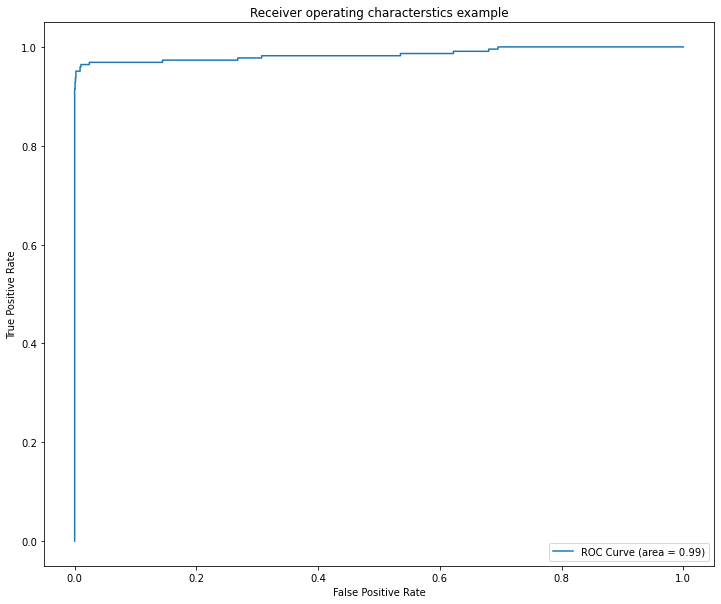

In [36]:
draw_roc(ytest,y_pred_cv_proba[:,1])

In [37]:
random_text = ["can you share me the acc detail to use your credit card and win free reward upto 10000 and will fix a date on sunday win CASH! From 100 to 20,000 pound"]
xmanual_test = pd.DataFrame({'sms':random_text})

xmanual_transformed = countvect.transform(xmanual_test['sms']) # to compress the sparse matrix

pred = mnb.predict(xmanual_transformed)

if pred[0] == 0:
    print('HAM')
else:
    print('SPAM')

SPAM
